# Julia Academy

## Data Science Course

# 12. Visualisation in Julia

**Huda Nassar**

**Source:** https://github.com/JuliaAcademy/DataScience/blob/main/12.%20Visualization.ipynb

We will look at more examples of visualisations and go into more detail

In [1]:
ENV["GKS_ENCODING"] = "utf-8"

"utf-8"

In [2]:
using Plots
using Plots.PlotMeasures
using StatsPlots
using Statistics
using StatsBase
using MLBase
using XLSX
using DataFrames

gr()   # using GR backend for Plots

Plots.GRBackend()

In [3]:
state_abbreviations = Dict(
    "Alabama" => "AL",
    "Alaska" => "AK",
    "Arizona" => "AZ",
    "Arkansas" => "AR",
    "California" => "CA",
    "Colorado" => "CO",
    "Connecticut" => "CT",
    "Delaware" => "DE",
    "Florida" => "FL",
    "Georgia" => "GA",
    "Hawaii" => "HI",
    "Idaho" => "ID",
    "Illinois" => "IL",
    "Indiana" => "IN",
    "Iowa" => "IA",
    "Kansas" => "KS",
    "Kentucky" => "KY",
    "Louisiana" => "LA",
    "Maine" => "ME",
    "Maryland" => "MD",
    "Massachusetts" => "MA",
    "Michigan" => "MI",
    "Minnesota" => "MN",
    "Mississippi" => "MS",
    "Missouri" => "MO",
    "Montana" => "MT",
    "Nebraska" => "NE",
    "Nevada" => "NV",
    "New Hampshire" => "NH",
    "New Jersey" => "NJ",
    "New Mexico" => "NM",
    "New York" => "NY",
    "North Carolina" => "NC",
    "North Dakota" => "ND",
    "Ohio" => "OH",
    "Oklahoma" => "OK",
    "Oregon" => "OR",
    "Pennsylvania" => "PA",
    "Rhode Island" => "RI",
    "South Carolina" => "SC",
    "South Dakota" => "SD",
    "Tennessee" => "TN",
    "Texas" => "TX",
    "Utah" => "UT",
    "Vermont" => "VT",
    "Virginia" => "VA",
    "Washington" => "WA",
    "West Virginia" => "WV",
    "Wisconsin" => "WI",
    "Wyoming" => "WY", 
    "District of Columbia"=>"DC");

### Quick note on long tick labels bugs

Currently, there seems to be an issue with using xticks labels that are rotated and long, like the plot I show next. As per this issue https://github.com/JuliaPlots/Plots.jl/issues/2107, this hasn't been fixed yet. But here is a quick function that will act as a "hack" to avoid this problem.

In [4]:
function pad_empty_plot(p)
    ep = plot(grid=false, legend=false, axis=false, ticks=nothing, framestyle=:box) #empty plot
    newplot = plot(p, ep, layout=@layout([a{0.99h}; b{0.001h}]))
    return newplot
end

pad_empty_plot (generic function with 1 method)

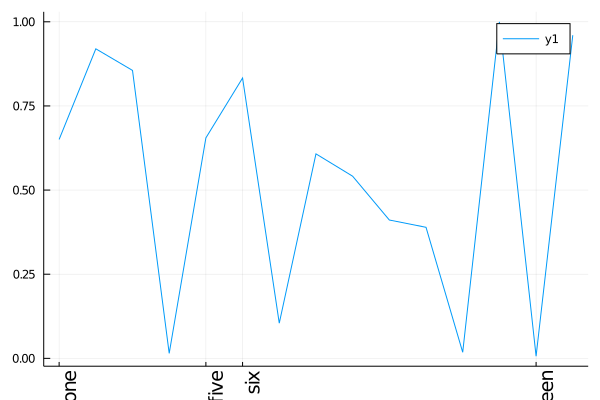

In [5]:
xtickslabels = ["one","five","six","fourteen"]
# without fix
p = plot(rand(15), xticks=([1,5,6,14], xtickslabels), xrotation=90, xtickfont=font(13))

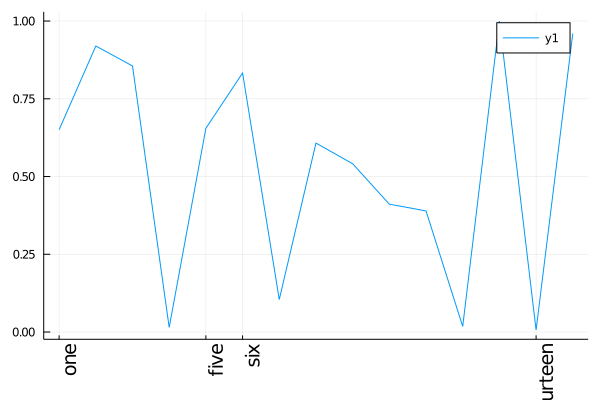

In [6]:
# with fix
pad_empty_plot(p)

## Zillow Data

We'll use the Zillow data and explore prices as well

In [7]:
data = DataFrame(XLSX.readtable("data/zillow_data_download_april2020.xlsx", "Sales_median_price_city")...);
dropmissing!(data)
states = data[:, :StateName];

We'll focus on the following three states only:

In [8]:
NY_idx = findall(states.=="New York")
NY_df = dropmissing(data[NY_idx,:])

CA_idx = findall(states.=="California")
CA_df = dropmissing(data[CA_idx,:])

FL_idx = findall(states.=="Florida")
FL_df = dropmissing(data[FL_idx,:]);

## Plot 1: Symmetric violin plots and annotations

We will get started by just picking the most recent data we have about these states and plot their violin plots to see the distribution of house prices.

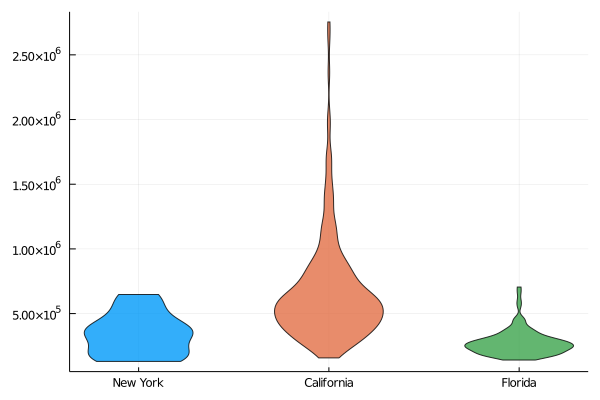

In [9]:
# pick a year: 2020-02
ca = CA_df[!,Symbol("2020-02")]
ny = NY_df[!,Symbol("2020-02")]
fl = FL_df[!,Symbol("2020-02")]

# we can successively add a violin plot category using ! notation
violin(["New York"], ny, legend=false, alpha=0.8)
violin!(["California"], ca, alpha=0.8)
violin!(["Florida"], fl, alpha=0.8)



From Huda:

> One concept I learned from reading one of Edward Tufte's books is the idea of avoiding symmetry. Here, as you can see, each violin plot is symmetric. We can probably fit more information there by making use of each side of the violin plot. And indeed, we will now compare housing prices in these states from February 2020 with housing prices from 10 years before that (February 2010).

This makes sense to us since we're losing space by having the symemtric plots. What if we compared Feb 2020 with Feb 2010 which each other to see how things have changed in a decade?

> We can do this by specifying the left and right handles of the violin plots

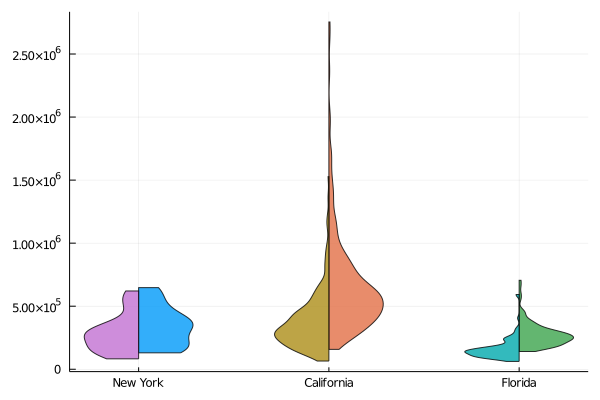

In [10]:
# 2020 data
ca20 = CA_df[!, Symbol("2020-02")]
ny20 = NY_df[!, Symbol("2020-02")]
fl20 = FL_df[!, Symbol("2020-02")]
violin(["New York"], ny20, legend=false, alpha=0.8, side=:right)
violin!(["California"], ca20,alpha=0.8, side=:right)
violin!(["Florida"], fl20, alpha=0.8, side=:right)

### get the February 2010 data
ca10 = CA_df[!, Symbol("2010-02")]
ny10 = NY_df[!, Symbol("2010-02")]
fl10 = FL_df[!, Symbol("2010-02")]

violin!(["New York"], ny10, legend=false, alpha=0.8, side=:left)
violin!(["California"], ca10, alpha=0.8,side=:left)
violin!(["Florida"], fl10, alpha=0.8, side=:left)

So now we can compare each side but how do we immediately no which side is which? We need to colorcode and use a legend. I choose a cold->warm color progression to lead the eye from 2010 to 2020

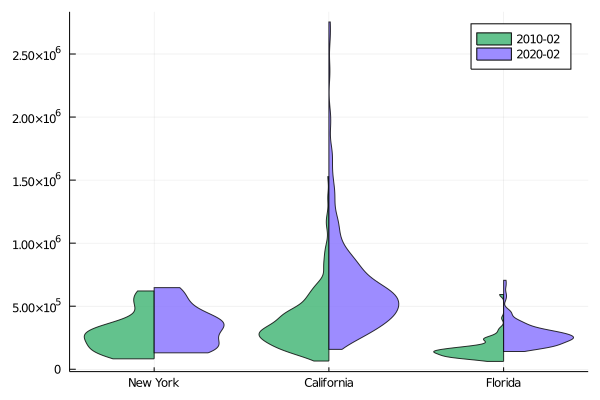

In [11]:

violin(["New York"], ny10, alpha=0.8, color="mediumseagreen", side=:left, label="2010-02")
violin!(["California"], ca10, alpha=0.8, color="mediumseagreen",side=:left, label="")
violin!(["Florida"], fl10, alpha=0.8, color="mediumseagreen", side=:left, label="")

violin!(["New York"], ny20, alpha=0.8, color="lightslateblue", side=:right, label="2020-02")
violin!(["California"], ca20,alpha=0.8, color="lightslateblue", side=:right, label="")
violin!(["Florida"], fl20, alpha=0.8, color="lightslateblue", side=:right, label="")

Now we'll add annotations to show the medians for 2020

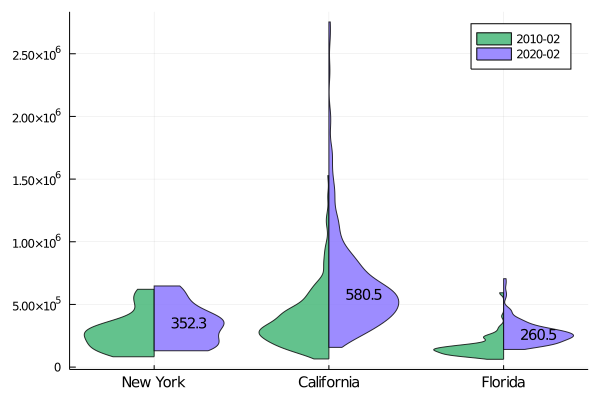

In [12]:

violin(["New York"], ny10, alpha=0.8, color="mediumseagreen", side=:left, label="2010-02")
violin!(["California"], ca10, alpha=0.8, color="mediumseagreen",side=:left, label="")
violin!(["Florida"], fl10, alpha=0.8, color="mediumseagreen", side=:left, label="")

violin!(["New York"], ny20, alpha=0.8, color="lightslateblue", side=:right, label="2020-02")
violin!(["California"], ca20,alpha=0.8, color="lightslateblue", side=:right, label="")
violin!(["Florida"], fl20, alpha=0.8, color="lightslateblue", side=:right, label="")

m = median(ny20)
ep = 0.1
annotate!([(0.5+ep, m+0.05, text(m/1000,10,:left))])

m = median(ca20)
ep = 0.1
annotate!([(1.5+ep, m+0.05, text(m/1000,10,:left))])

m = median(fl20)
ep = 0.1
annotate!([(2.5+ep, m+0.05, text(m/1000,10,:left))])

plot!(xtickfont=font(10))

## Plot 2: Bar charts, histograms and insets

Now let's compare states based on frequency counts in their data

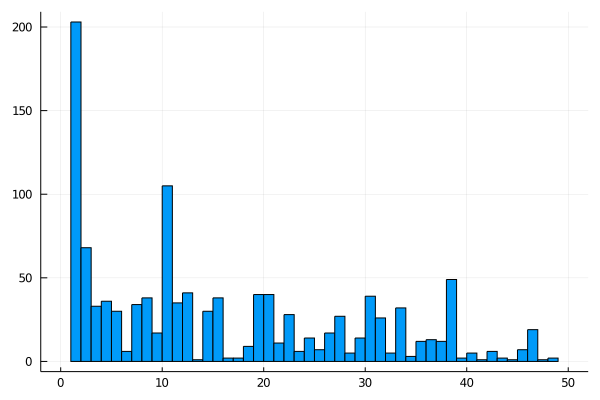

In [13]:
states_map = labelmap(states)
state_idx = labelencode(states_map, states)
histogram(state_idx, nbins=length(states_map), legend=false)



There are a few problems with this histogram. First, unsorted histograms are often harder to read so the first thing we will do is rearrange this histogram. Next, we will add annotations to be able to map each bar to a state quickly.


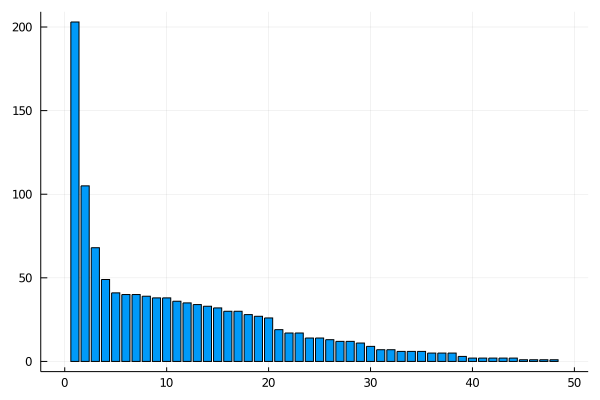

In [14]:
# first we'll start with sorting
h = fit(Histogram, state_idx, nbins=length(states_map))
idx_sorted = sortperm(h.weights, rev=true)
bar(h.weights[idx_sorted], legend=false)

Next, we will arrange this plot horizontally (via the orientation = :horizontal argument) and add annotations.

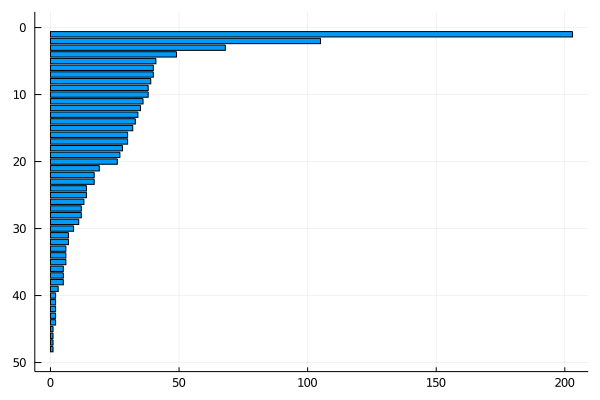

In [15]:
bar(h.weights[idx_sorted], legend=false ,orientation=:horizontal, yflip=true)

Now let's annotate using the two-letter state annotations

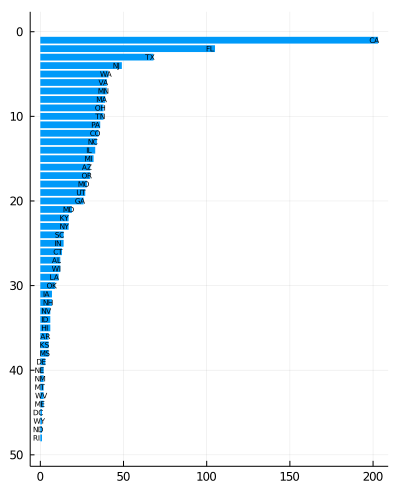

In [16]:
bar(h.weights[idx_sorted], legend=false, orientation=:horizontal, yflip=true, linewidth=0, width=0, size=(400,500))

state_annotations = states_map.vs[idx_sorted]
for i = 1:length(state_annotations)
    annotate!([(h.weights[idx_sorted][i]-5, i, text(state_abbreviations[state_annotations[i]], 5, :left))])
end
plot!()

This is a bit two hard to read so let's move the lower numbers to the bottom corner

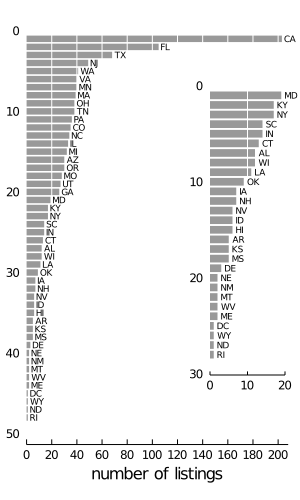

In [17]:
bar(h.weights[idx_sorted], legend=false, orientation =:horizontal,
    yflip=true, linewidth=0, color=:gray, alpha=0.8, size=(300,500))
state_annotations = states_map.vs[idx_sorted]

# idea from Edward Tufte: add vertical lines to the bar plot to act as "ruler markings" to help visually show magnitude along the bar
ht = length(h.weights)
for i = 20:20:200
    plot!([i,i],[ht,0],color=:white)
end

for i = 1:length(state_annotations)
    annotate!([(h.weights[idx_sorted][i]+2, i,text(state_abbreviations[state_annotations[i]], 6, :left))])
end
plot!(grid=false, yaxis=false, xlim=(0,maximum(h.weights)+5), xticks = 0:20:200)
xlabel!("number of listings")

figure = Plots.plot!(inset = bbox(0.7,0.15,0.25,0.6,:top,:left))
# add second bar
bar!(figure[2], h.weights[idx_sorted][21:end], legend=false, orientation=:horizontal,
     yflip=true,linewidth=0,width=0,color=:gray,alpha=0.8)
for i = 21:length(state_annotations)
    annotate!(figure[2],[(h.weights[idx_sorted][i]+1,i-20,text(state_abbreviations[state_annotations[i]],6,:left))])
end
# add second ruler marking (there is only one)
plot!(figure[2], [10,10], [20,0],color=:white, xticks=0:10:20, yaxis=false, grid=false, xlim=(0,20))
plot!()

### Plot 3: Plots with error bars

Next, we will compare one state's prices over the years and see how they have changed. we will use error bars to show the uncertainty.

In [18]:
M = Matrix(NY_df[:, 5:end])

17×144 Array{Any,2}:
 478300  474800  486700  489800  502700  …  543100  546900  537500  538900
 163600  164200  155100  149600  151200     165500  173300  173700  182500
 671000  653500  634700  631600  620400     623500  651700  631600  649200
 589800  611100  573600  628100  599000     625600  622400  633400  628800
 247400  250100  225400  192600  196500     286400  278700  262200  281500
 318100  302200  293300  279400  279800  …  340300  338000  337900  344000
 353400  344100  343000  343100  343100     354500  377600  377600  399700
 411700  398900  402900  410500  420600     506300  493300  508700  502800
 138900  134600  133600  136600  135300     162400  158500  160100  154800
 350800  341500  340300  339400  336000     395800  394400  391300  393900
 369600  383600  405600  411400  419300  …  394300  391400  381100  359500
  69500   67000   73800   72300   80900      99300  117700  116600  128400
  96600  103500  103700  108800  106500     149700  153400  153000  150400
 141

In [19]:
xtickslabels = string.(names(NY_df[!, 5:end]));

First we show each region in NY separately to get an idea of variance

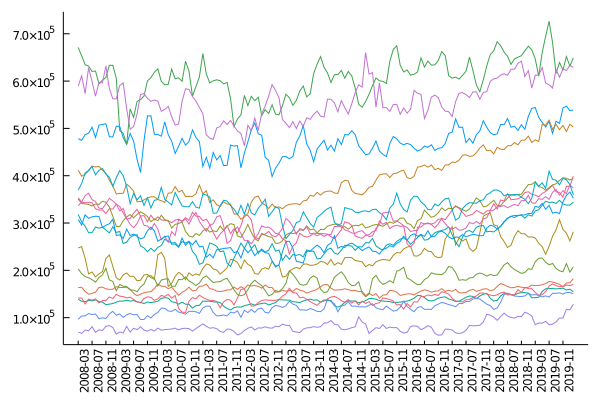

In [20]:
plot()
for i = 1:size(M,1)
    plot!(M[i,:], legend=false)  # each region in the state is a row
end
plot!()
p = plot!(xticks=(1:4:length(xtickslabels), xtickslabels[1:4:end]), xrotation=90, xtickfont=font(8), grid=false)
pad_empty_plot(p)

While this plot shows us the variation, it isn't indicative of the entire trend. What we'll do is find the median value (P50) and 80th and 20th percentiles for each time point to plot a confidence interval around the NY median house price per region. Unsurprisingly this error range will be large owing to regional differences within NY 

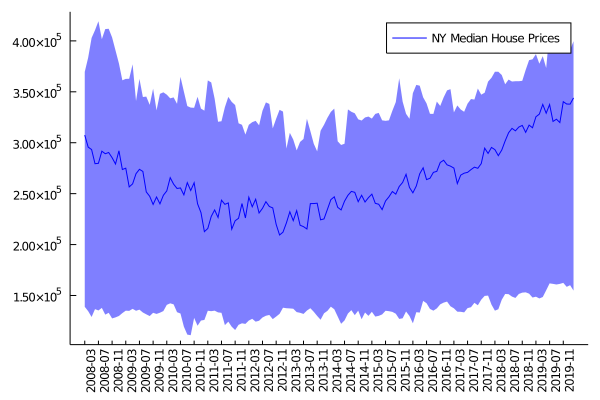

In [21]:
function find_percentile(M, pct)
    r = zeros(size(M,2))
    for i = 1:size(M,2)
        v = M[:,i]
        len = length(v)
        ind = floor(Int64, pct*len)
        new_array = sort(v);
        r[i] = new_array[ind];
    end
    return r
end

median_ = find_percentile(M,0.5)
upper_ = find_percentile(M,0.8)
lower_ = find_percentile(M,0.2)
plot(median_, 
     ribbon=(median_.-lower_, upper_.-median_),   # confidence band
     label="NY Median House Prices", 
     color=:blue, 
     grid=false)
p = plot!(xticks = (1:4:length(xtickslabels), xtickslabels[1:4:end]), xrotation=90, xtickfont=font(8))
pad_empty_plot(p)

Next, we will just put everything together in one function. note the ! symbol at the end of the name -- this is because we will pass a plot canvas plotid as an argument, and this function will modify it.

In [22]:
function plot_individual_state!(plotid, statevalue, colorid)
    curids = findall(states.==statevalue)
    curFrame = data[curids, :]
    M = Matrix(curFrame[:,5:end])
    med = find_percentile(M, 0.5)
    upper = find_percentile(M, 0.8)
    lower = find_percentile(M, 0.2)
    plot!(plotid, med, ribbon=(med.-lower, upper.-med), color=colorid, label=state_abbreviations[statevalue], grid=false)
    plot!(plotid, xticks=(1:4:length(xtickslabels), xtickslabels[1:4:end]), xrotation=90, xtickfont=font(8))
end


plot_individual_state! (generic function with 1 method)

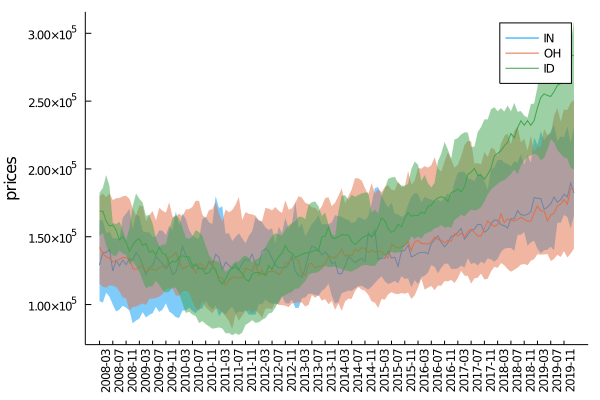

In [23]:
plotid = plot(size=(1200,500))
plot_individual_state!(plotid, "Indiana", 1)
plot_individual_state!(plotid, "Ohio", 2)
plot_individual_state!(plotid, "Idaho", 3)
# plot_individual_state!(plotid, "California", 4)
ylabel!("prices")
pad_empty_plot(plotid)

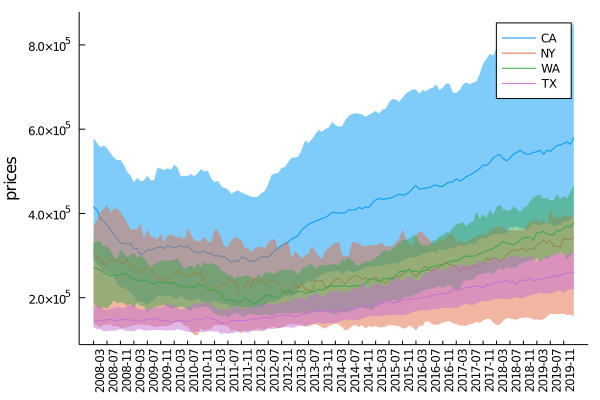

In [24]:
plotid = plot(size=(1200,500))
plot_individual_state!(plotid, "California", 1)
plot_individual_state!(plotid, "New York", 2)
plot_individual_state!(plotid, "Washington", 3)
plot_individual_state!(plotid, "Texas", 4)
# plot_individual_state!(plotid, "Georgia", 5)
ylabel!("prices")
pad_empty_plot(plotid)

### Plot 4: Plots with Double Axes

We will plot variables with different magnitudes to the same scale using separate y axes, eg:

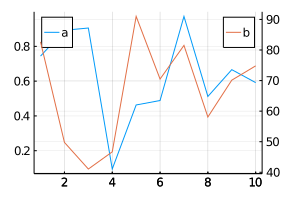

In [25]:
vector1 = rand(10)
vector2 = rand(10) * 100  # two orders of magnitude larger
plot(vector1, label="a", size=(300,200), legend=:topleft)
plot!(twinx(), vector2, label="b", color=2)

In [26]:
xtickslabels = NY_df[!,:RegionName];

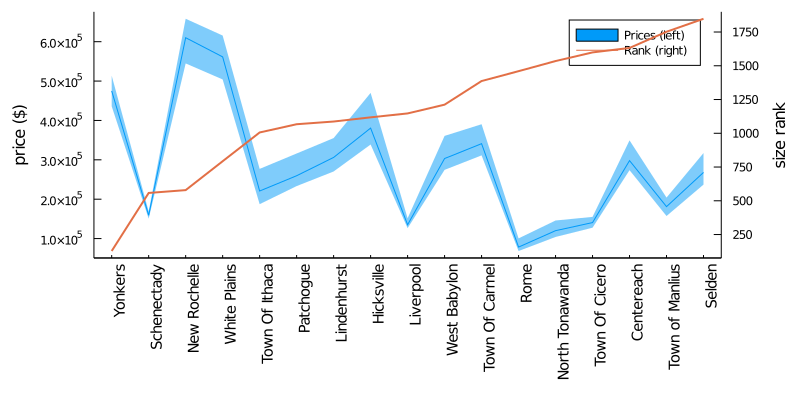

In [54]:
size_rank = NY_df[!,:SizeRank]
# prices
M = Matrix(NY_df[:, 5:end])
M = copy(M')

# median + error bar prices per region in NY
md = find_percentile(M, 0.5)
mu = find_percentile(M, 0.9)
ml = find_percentile(M, 0.1)

# # plot prices on the left
plot(md, ribbon=(md.-ml, mu.-md), ylabel="price (\$)", color=1, grid=false, label="")  # ignore the label for legend
plot!(xticks=(1:length(xtickslabels), xtickslabels), xrotation=90, xtickfont=font(10))

# plot size rank on the right
plot!(twinx(), size_rank, ylabel="size rank", color=2, grid=false, xticks=nothing, linewidth=2, label="")  # again ignore the label for legend

# now create the legend manually
plot!(Shape([],[]), color=1, label="Prices (left)")
plot!([],[], color=2, label="Rank (right)")

plot!(size=(800, 400), left_margin=5mm, right_margin=18mm, bottom_margin=30mm)

## Plot 5: Using colorscales to add dimension to 2-D plot

We will use the California data, and plot the prices from 2010-02 on the x-axis and 2020-02 on the y-axis. We will then color code each data point by its current rank.

Let's generate a quick scatter plot first.

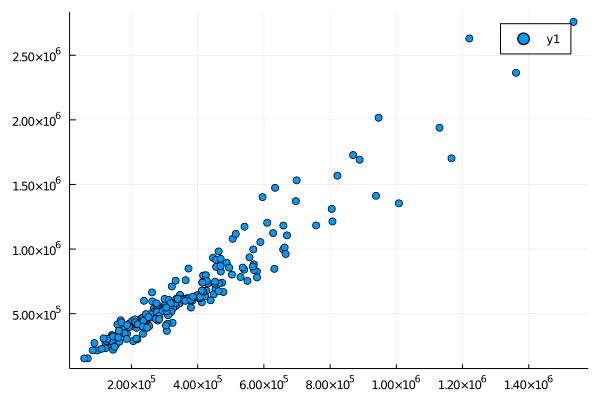

In [50]:
CA202002 = CA_df[!,Symbol("2020-02")]
CA201002 = CA_df[!,Symbol("2010-02")]
scatter(CA201002,CA202002)

To work with colors we will make use of the package `ColorSchemes.jl`

In [57]:
using ColorSchemes

We will create a color scale for the `SizeRank` of CA housing data

In [63]:
CAranks = CA_df[!,:SizeRank]

# normalize the ranks to be between 0 and 1
continuousranks = CAranks./maximum(CAranks)

# create a placeholder vector of type RGB{Float64} that will store the color of each value
colorsvec = Vector{RGB{Float64}}(undef, length(continuousranks))

# and finally map the colors according to ColorSchemes.autumn1, there are many other schemes you can choose from
map(i->colorsvec[i]=get(ColorSchemes.plasma, continuousranks[i]), 1:length(colorsvec))

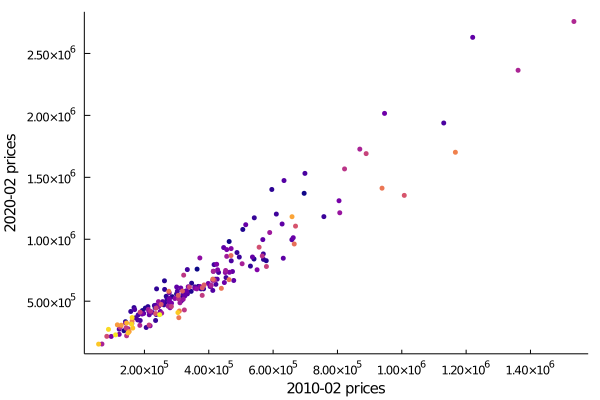

In [64]:
scatter(CA201002,CA202002, color=colorsvec, markerstrokewidth=0, markersize=3, grid=false, legend=false)
xlabel!("2010-02 prices", xguidefontsize=10)
ylabel!("2020-02 prices", yguidefontsize=10)
p1 = plot!()

However, what do the colors mean? We can manually create a colorbar with annotations for the SizeRank

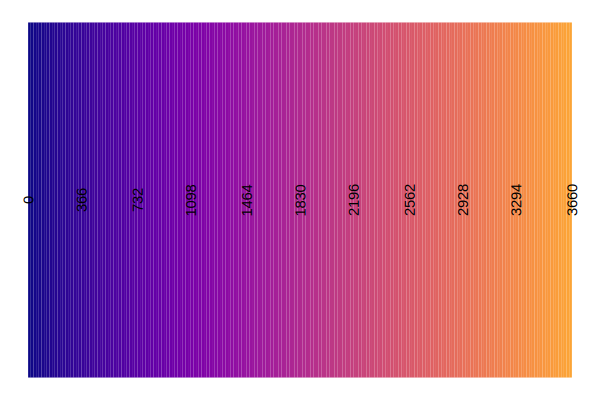

In [91]:
#set up the plot canvas
xvals = 0:length(colorsvec)
s = Shape([0,1,1,0],[0,0,1,1])

# plot each bar next to each other
plot(s, color=ColorSchemes.plasma[1], 
     grid=false, axis=false, legend=false, xticks=false, yticks=false, linewidth=0, linecolor=nothing)
for i = 2:length(colorsvec)+1
    s = Shape([xvals[i], xvals[i]+1, xvals[i]+1, xvals[i]], [0,0,1,1])
    plot!(s, color=ColorSchemes.plasma[i], 
          grid=false, axis=false, legend=false, linewidth=0, linecolor=nothing)
end

mynormalizer = maximum(CAranks)
xtickslabels = 0:div(mynormalizer,10):mynormalizer
continuousranks = xtickslabels ./ mynormalizer
xticksloc = round.(Int, continuousranks .* (length(colorsvec)+1))

# annotate using the ranks
rotatedfont = font(10, "Helvetica", rotation=90)
for i = 1:length(xtickslabels)
    annotate!(xticksloc[i], 0.5, text(xtickslabels[i], rotatedfont))
end
cbar = plot!()



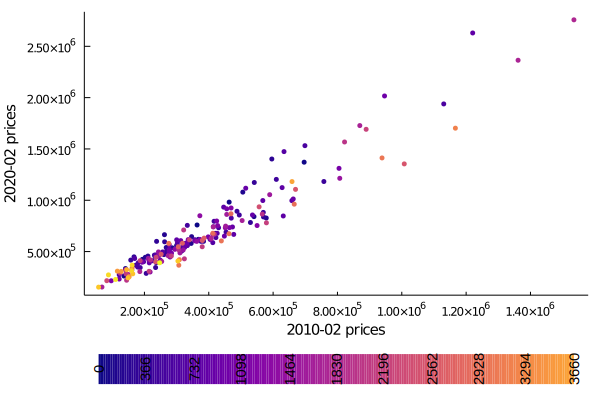

In [92]:
mylayout = @layout([a{0.89h};b{0.1h}])
plot(p1, cbar, layout=mylayout)